# What's in a Name?

In [1]:
import warnings
# Ignore numpy dtype warnings. These warnings are caused by an interaction
# between numpy and Cython and can be safely ignored.
# Reference: https://stackoverflow.com/a/40846742
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import nbinteract as nbi

sns.set()
sns.set_context('talk')
np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.set_option('display.max_rows', 7)
pd.set_option('display.max_columns', 8)
pd.set_option('precision', 2)
# This option stops scientific notation for pandas
# pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
def df_interact(df, nrows=7, ncols=7):
    '''
    Outputs sliders that show rows and columns of df
    '''
    def peek(row=0, col=0):
        return df.iloc[row:row + nrows, col:col + ncols]

    row_arg = (0, len(df), nrows) if len(df) > nrows else fixed(0)
    col_arg = ((0, len(df.columns), ncols)
               if len(df.columns) > ncols else fixed(0))
    
    interact(peek, row=row_arg, col=col_arg)
    print('({} rows, {} columns) total'.format(df.shape[0], df.shape[1]))

def display_df(df, rows=pd.options.display.max_rows,
               cols=pd.options.display.max_columns):
    with pd.option_context('display.max_rows', rows,
                           'display.max_columns', cols):
        display(df)

## Last letters

In [6]:
students = pd.read_csv('../disc03/names.csv')
students

,Timestamp,Name,Sex,Age
0,10/15/2019 21:49:38,Samuel,Male,24
1,10/16/2019 9:07:31,Aditi,Female,22
2,10/16/2019 9:07:34,Hanyang,Male,21
...,...,...,...,...
24,10/16/2019 16:08:45,Amy,Female,20
25,10/16/2019 16:08:46,Sheila,Female,21
26,10/16/2019 16:09:15,Thomas,Male,23


In [8]:
name = students.loc[0, 'Name']
name

'Samuel'

In [9]:
name[0]

'S'

In [10]:
name[-1]

'l'

In [7]:
students['Name'].str[0]

0     S
1     A
2     H
     ..
24    A
25    S
26    T
Name: Name, Length: 27, dtype: object

In [11]:
students['Name'].str[-1]

0     l
1     i
2     g
     ..
24    y
25    a
26    s
Name: Name, Length: 27, dtype: object

In [21]:
ca = pd.read_csv('CA.TXT', header=None,
                 names=['State', 'Sex', 'Year', 'Name', 'Count'])
ca

,State,Sex,Year,Name,Count
0,CA,F,1910,Mary,295
1,CA,F,1910,Helen,239
2,CA,F,1910,Dorothy,220
...,...,...,...,...,...
374631,CA,M,2017,Zia,5
374632,CA,M,2017,Ziad,5
374633,CA,M,2017,Ziv,5


In [22]:
ca['Name'].str[-1]

0         y
1         n
2         y
         ..
374631    a
374632    d
374633    v
Name: Name, Length: 374634, dtype: object

In [23]:
ca['Last'] = ca['Name'].str[-1]
ca

,State,Sex,Year,Name,Count,Last
0,CA,F,1910,Mary,295,y
1,CA,F,1910,Helen,239,n
2,CA,F,1910,Dorothy,220,y
...,...,...,...,...,...,...
374631,CA,M,2017,Zia,5,a
374632,CA,M,2017,Ziad,5,d
374633,CA,M,2017,Ziv,5,v


In [25]:
last_letter_pivot = ca.pivot_table(
    index='Last', # the rows (turned into index)
    columns='Sex', # the column values
    values='Count', # the field(s) to processed in each group
    aggfunc=sum, # group operation
)
last_letter_pivot

Sex,F,M
Last,,
a,5750384,185959
b,894,147627
c,2889,219350
...,...,...
x,3765,76274
y,1889040,1454502
z,19692,8854


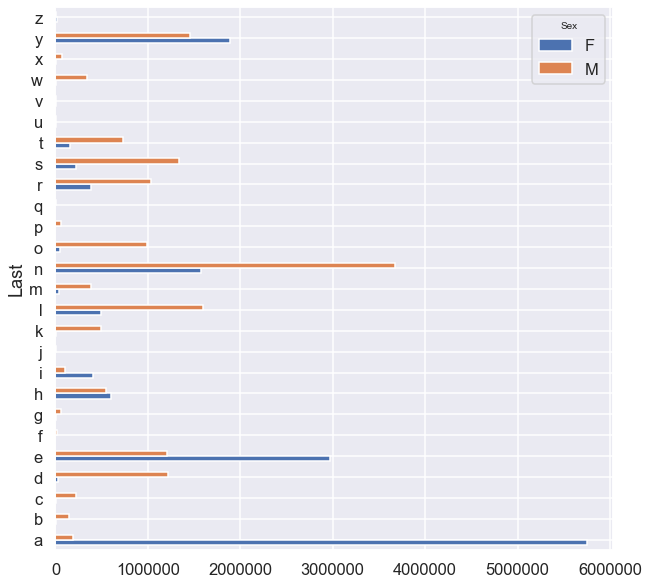

In [26]:
last_letter_pivot.plot.barh(figsize=(10, 10));

In [27]:
totals = last_letter_pivot['F'] + last_letter_pivot['M']

last_letter_props = pd.DataFrame({
    'F': last_letter_pivot['F'] / totals,
    'M': last_letter_pivot['M'] / totals,
}).sort_values('M')
last_letter_props.head()

,F,M
Last,,
a,0.97,0.03
i,0.80,0.20
e,0.71,0.29
z,0.69,0.31
y,0.56,0.44


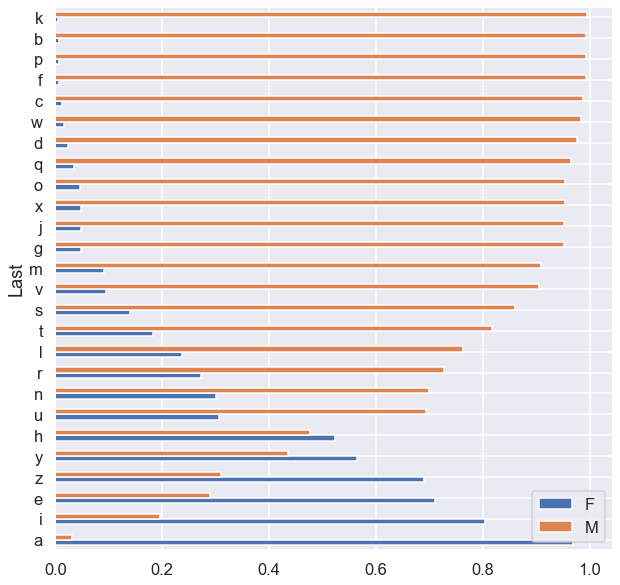

In [28]:
last_letter_props.plot.barh(figsize=(10, 10));